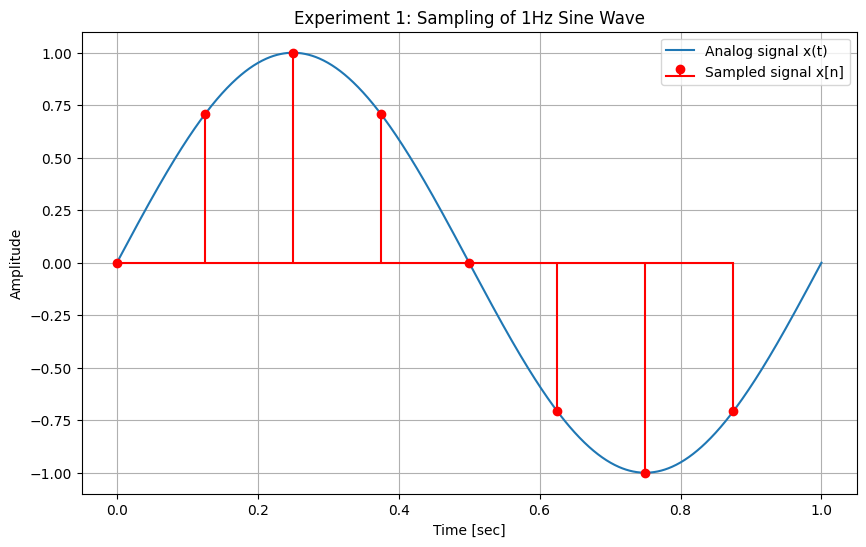

[0j, -4j, -0j, 0j, 0j, 0j, 0j, 4j]


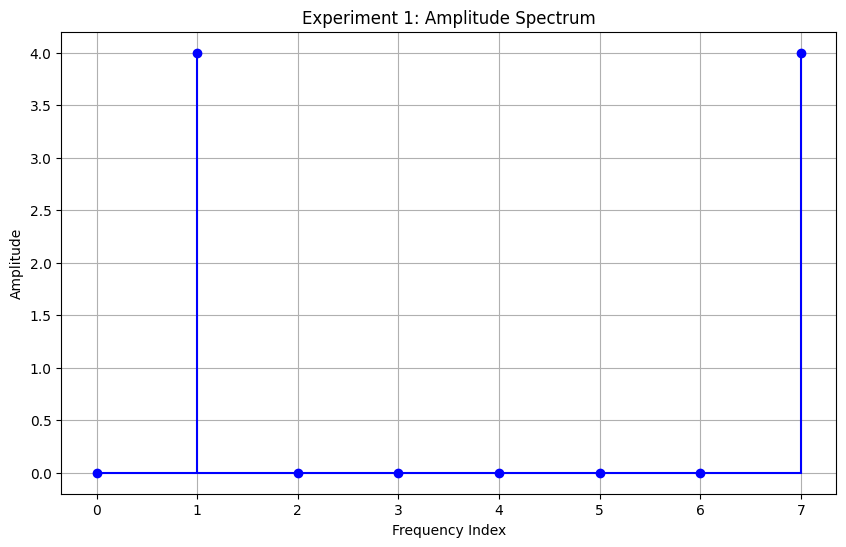

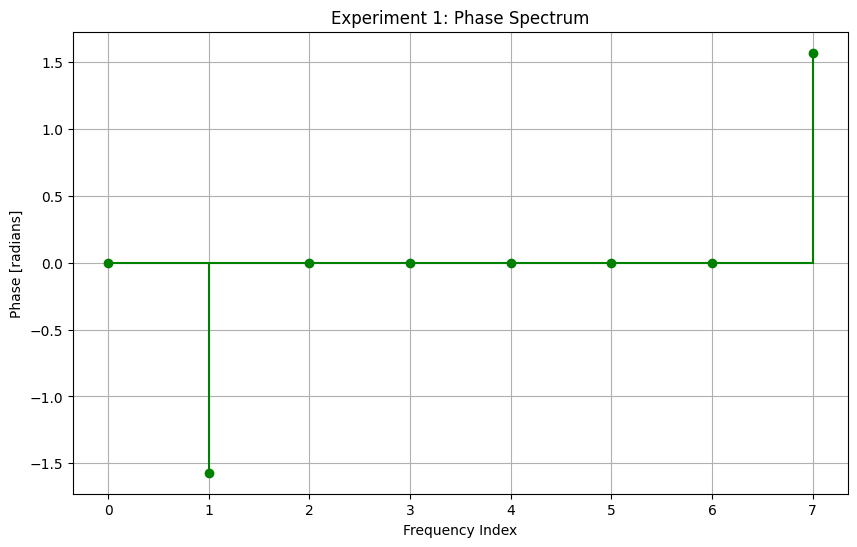

Experiment 1: Frequency Table
     k   ω [rad]      f  Ω [rad/sec]
0  0.0  0.000000  0.000     0.000000
1  1.0  0.785398  0.125     0.098175
2  2.0  1.570796  0.250     0.196350
3  3.0  2.356194  0.375     0.294524
4  4.0  3.141593  0.500     0.392699
5  5.0  3.926991  0.625     0.490874
6  6.0  4.712389  0.750     0.589049
7  7.0  5.497787  0.875     0.687223


In [74]:
# 1-1

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from typing import List

def analyze_sine_wave(A: float, T0: float, theta: float, D: float, experiment_num: int) -> None:
    # 基本周波数
    F0: float = 1 / T0
    Ts: float = 1 / 8

    # アナログ信号の生成
    t_continuous: np.ndarray = np.linspace(0, 1, 1000)  # 連続時間
    x_continuous: np.ndarray = A * np.sin(2 * np.pi * F0 * t_continuous + theta) + D

    # 離散時間信号の生成
    n: np.ndarray = np.arange(0, 8)
    t_discrete: np.ndarray = n * Ts
    x_discrete: np.ndarray = A * np.sin(2 * np.pi * F0 * t_discrete + theta) + D

    # プロット 1: 標本化
    plt.figure(figsize=(10, 6))
    plt.plot(t_continuous, x_continuous, label='Analog signal x(t)')
    plt.stem(t_discrete, x_discrete, linefmt='r-', markerfmt='ro', basefmt='r-', label='Sampled signal x[n]')
    plt.xlabel('Time [sec]')
    plt.ylabel('Amplitude')
    plt.title(f'Experiment {experiment_num}: Sampling of 1Hz Sine Wave')
    plt.legend()
    plt.grid()
    plt.savefig(f'sampling_experiment_{experiment_num}.png')
    plt.show()

    # DFT の計算
    N: int = len(x_discrete)
    X: np.ndarray = np.fft.fft(x_discrete, N)

    # 振幅スペクトル
    amplitude_spectrum: np.ndarray = np.abs(X)
    # 位相スペクトル
    fixed_X: np.ndarray = []
    for x in X:
        fixed_x_real = np.fix(x.real)
        fixed_x_imag = np.fix(x.imag)
        if (fixed_x_real == -0):
            fixed_x_real = 0
        fixed_X.append(complex(fixed_x_real, fixed_x_imag))
    print(fixed_X)
    phase_spectrum: np.ndarray = np.angle(fixed_X)

    # プロット 2: 振幅スペクトル
    plt.figure(figsize=(10, 6))
    plt.stem(n, amplitude_spectrum, linefmt='b-', markerfmt='bo', basefmt='b-')
    plt.xlabel('Frequency Index')
    plt.ylabel('Amplitude')
    plt.title(f'Experiment {experiment_num}: Amplitude Spectrum')
    plt.grid()
    plt.savefig(f'amplitude_spectrum_experiment_{experiment_num}.png')
    plt.show()

    # プロット 3: 位相スペクトル
    plt.figure(figsize=(10, 6))
    plt.stem(n, phase_spectrum, linefmt='g-', markerfmt='go', basefmt='g-')
    plt.xlabel('Frequency Index')
    plt.ylabel('Phase [radians]')
    plt.title(f'Experiment {experiment_num}: Phase Spectrum')
    plt.grid()
    plt.savefig(f'phase_spectrum_experiment_{experiment_num}.png')
    plt.show()

    # 周波数インデックスと各変数の対応表
    freq_index: np.ndarray = n
    omega: np.ndarray = 2 * np.pi * freq_index / N
    freq_Hz: np.ndarray = freq_index / N
    omega_rad_per_sec: np.ndarray = omega * Ts

    frequency_table: np.ndarray = np.vstack((freq_index, omega, freq_Hz, omega_rad_per_sec)).T

    df_frequency_table: pd.DataFrame = pd.DataFrame(frequency_table, columns=['k', 'ω [rad]', 'f', 'Ω [rad/sec]'])
    print(f'Experiment {experiment_num}: Frequency Table')
    print(df_frequency_table)

    # テーブルを保存
    df_frequency_table.to_csv(f'frequency_table_experiment_{experiment_num}.csv', index=False)

# [exec]
analyze_sine_wave(A=1, T0=1, theta=0, D=0, experiment_num=1)


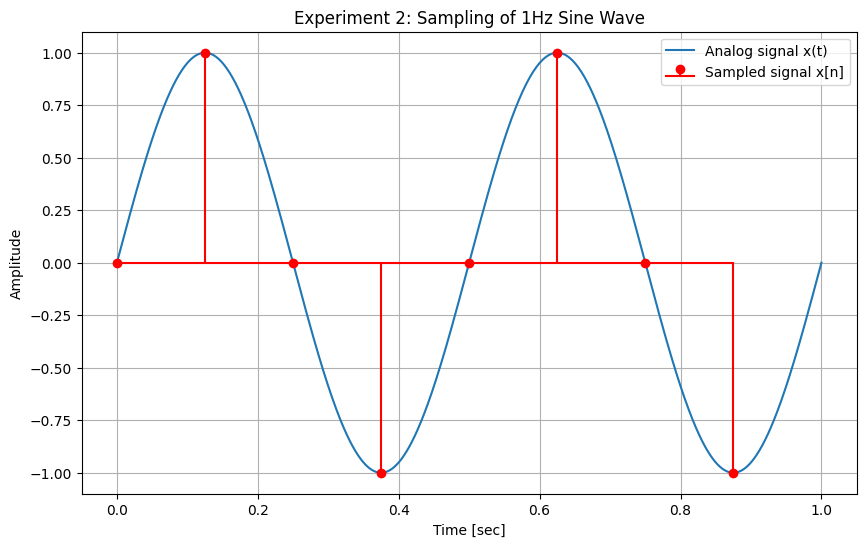

[0j, 0j, -4j, -0j, 0j, 0j, 4j, -0j]


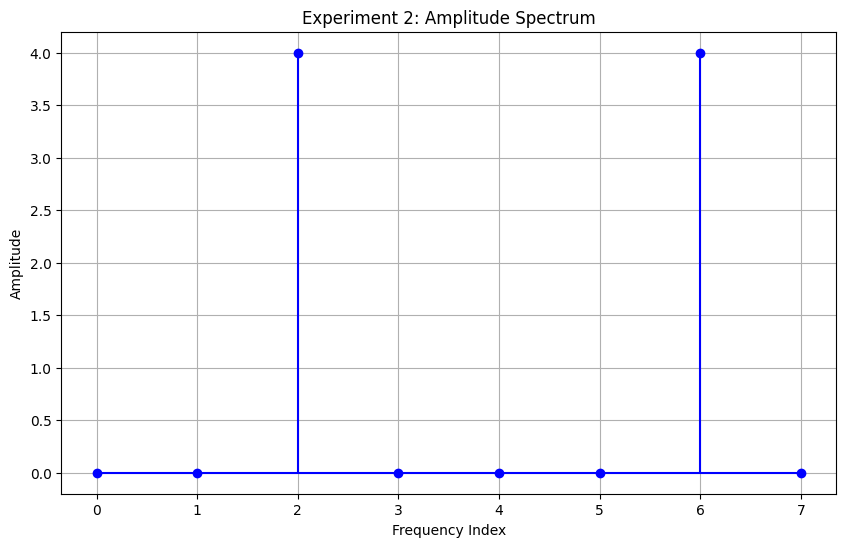

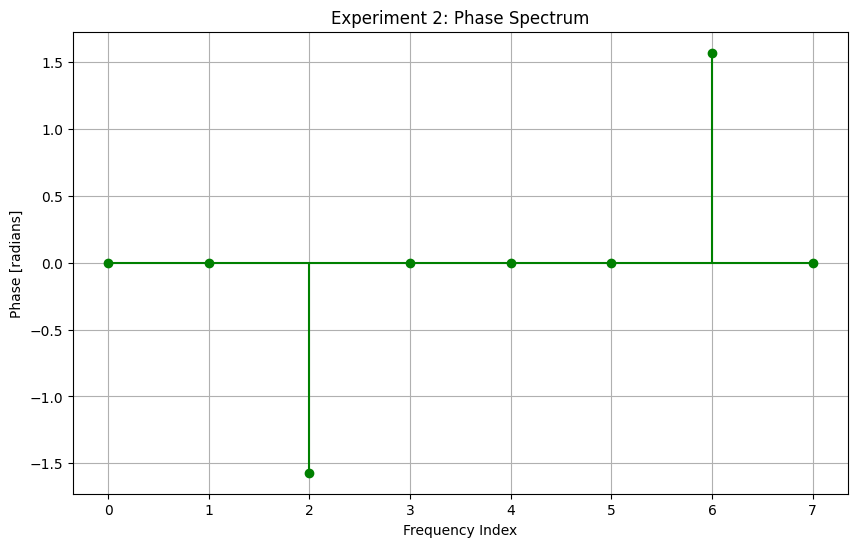

Experiment 2: Frequency Table
     k   ω [rad]      f  Ω [rad/sec]
0  0.0  0.000000  0.000     0.000000
1  1.0  0.785398  0.125     0.098175
2  2.0  1.570796  0.250     0.196350
3  3.0  2.356194  0.375     0.294524
4  4.0  3.141593  0.500     0.392699
5  5.0  3.926991  0.625     0.490874
6  6.0  4.712389  0.750     0.589049
7  7.0  5.497787  0.875     0.687223


In [75]:
# 1-2

analyze_sine_wave(A=1, T0=1/2, theta=0, D=0, experiment_num=2)


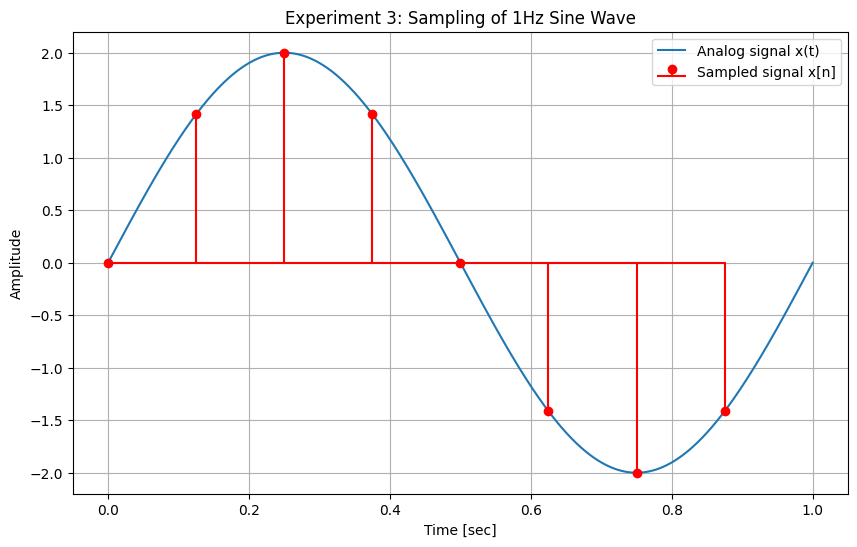

[0j, -8j, -0j, 0j, 0j, 0j, 0j, 8j]


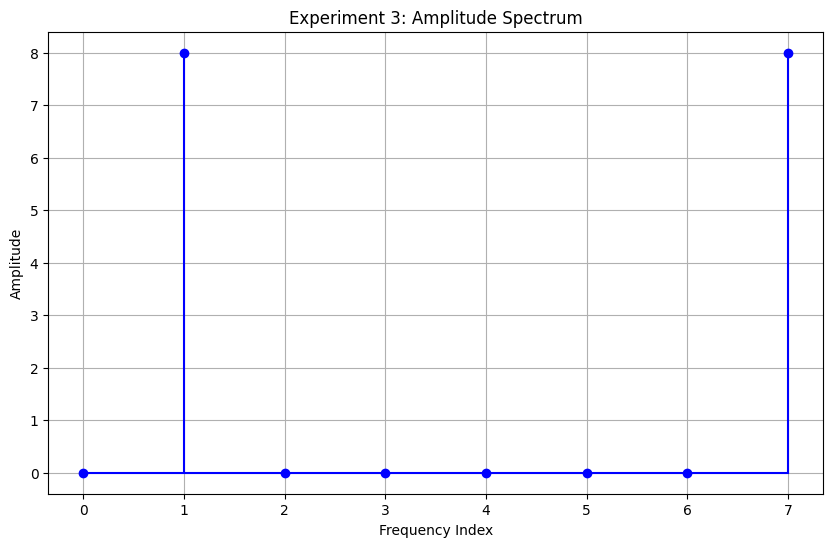

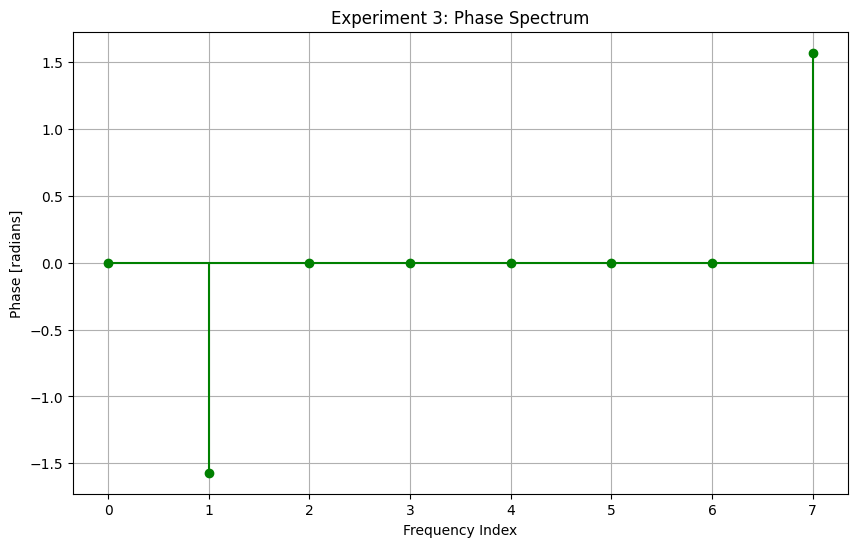

Experiment 3: Frequency Table
     k   ω [rad]      f  Ω [rad/sec]
0  0.0  0.000000  0.000     0.000000
1  1.0  0.785398  0.125     0.098175
2  2.0  1.570796  0.250     0.196350
3  3.0  2.356194  0.375     0.294524
4  4.0  3.141593  0.500     0.392699
5  5.0  3.926991  0.625     0.490874
6  6.0  4.712389  0.750     0.589049
7  7.0  5.497787  0.875     0.687223


In [76]:
# 1-3

analyze_sine_wave(A=2, T0=1, theta=0, D=0, experiment_num=3)

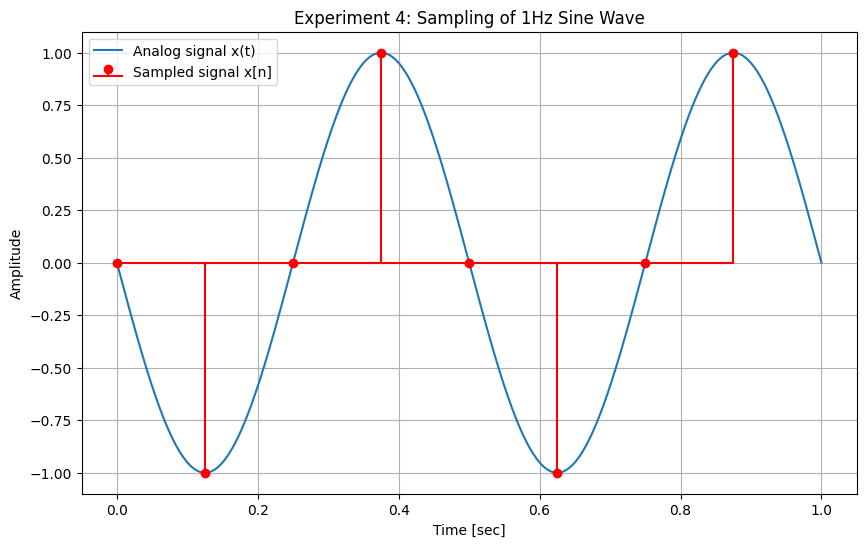

[0j, -0j, 4j, 0j, 0j, -0j, -4j, 0j]


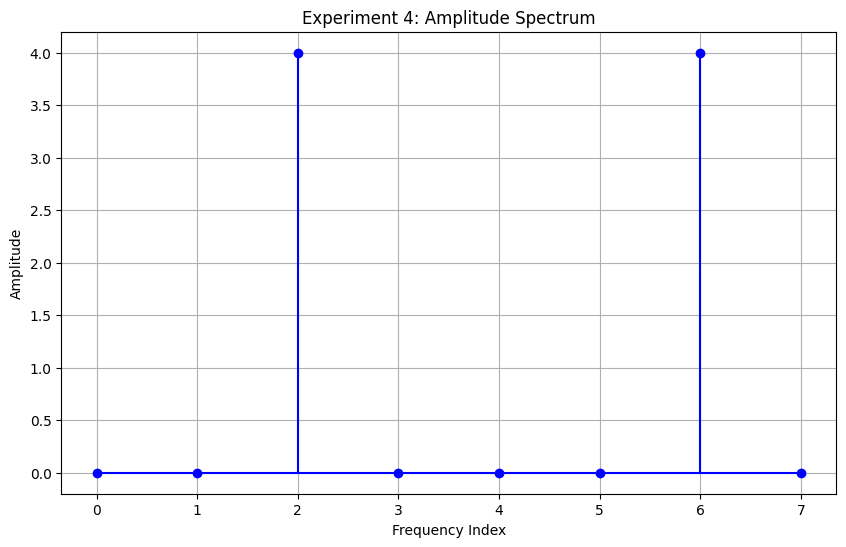

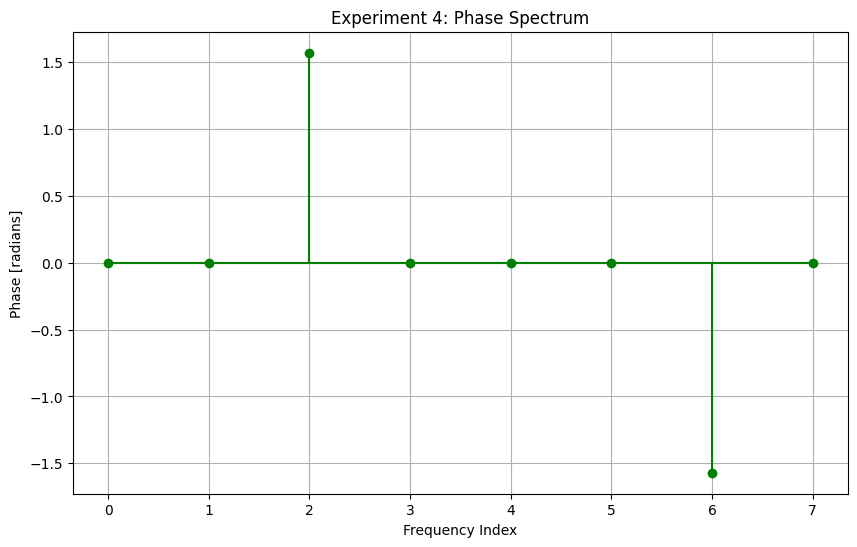

Experiment 4: Frequency Table
     k   ω [rad]      f  Ω [rad/sec]
0  0.0  0.000000  0.000     0.000000
1  1.0  0.785398  0.125     0.098175
2  2.0  1.570796  0.250     0.196350
3  3.0  2.356194  0.375     0.294524
4  4.0  3.141593  0.500     0.392699
5  5.0  3.926991  0.625     0.490874
6  6.0  4.712389  0.750     0.589049
7  7.0  5.497787  0.875     0.687223


In [77]:
# 1-4

analyze_sine_wave(A=1, T0=1/2, theta=np.pi, D=0, experiment_num=4)

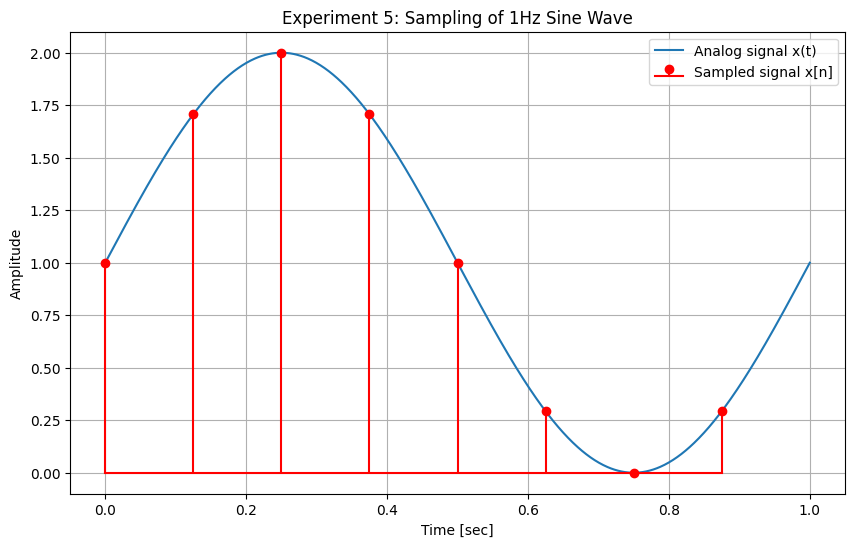

[(8+0j), -4j, -0j, 0j, 0j, 0j, 0j, 4j]


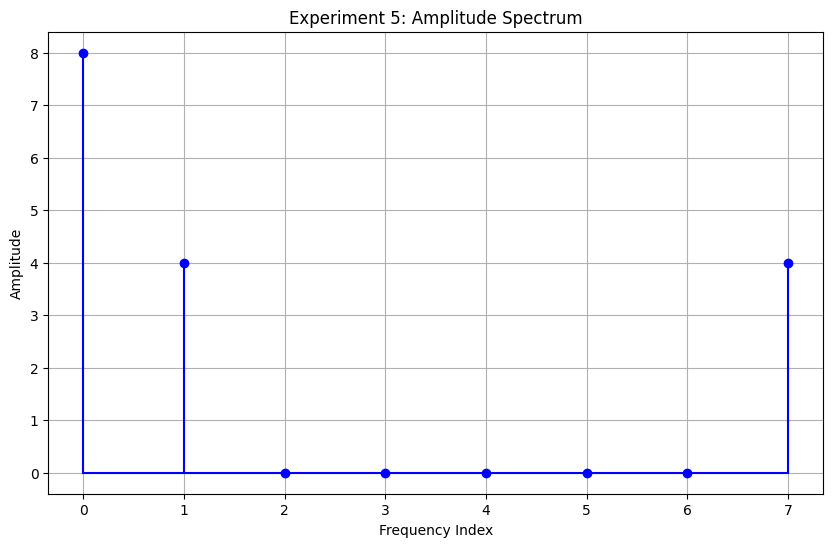

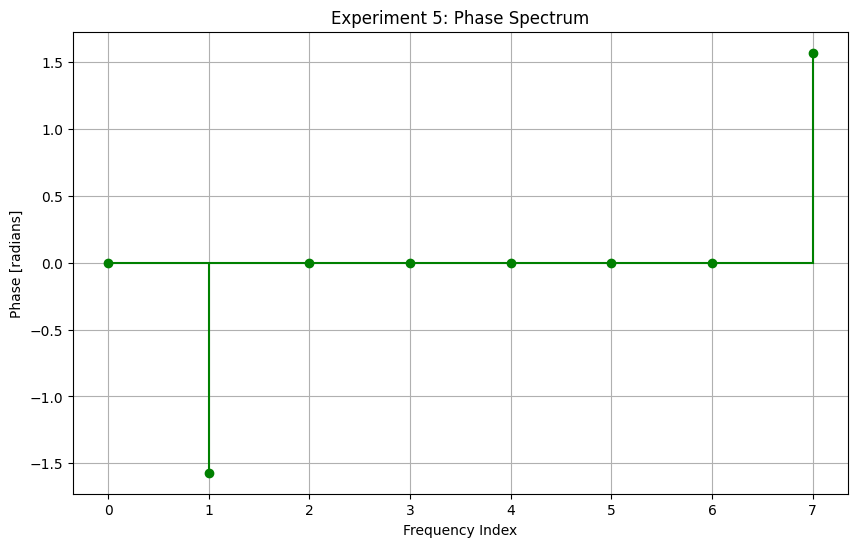

Experiment 5: Frequency Table
     k   ω [rad]      f  Ω [rad/sec]
0  0.0  0.000000  0.000     0.000000
1  1.0  0.785398  0.125     0.098175
2  2.0  1.570796  0.250     0.196350
3  3.0  2.356194  0.375     0.294524
4  4.0  3.141593  0.500     0.392699
5  5.0  3.926991  0.625     0.490874
6  6.0  4.712389  0.750     0.589049
7  7.0  5.497787  0.875     0.687223


In [78]:
# 1-5

analyze_sine_wave(A=1, T0=1, theta=0, D=1, experiment_num=5)


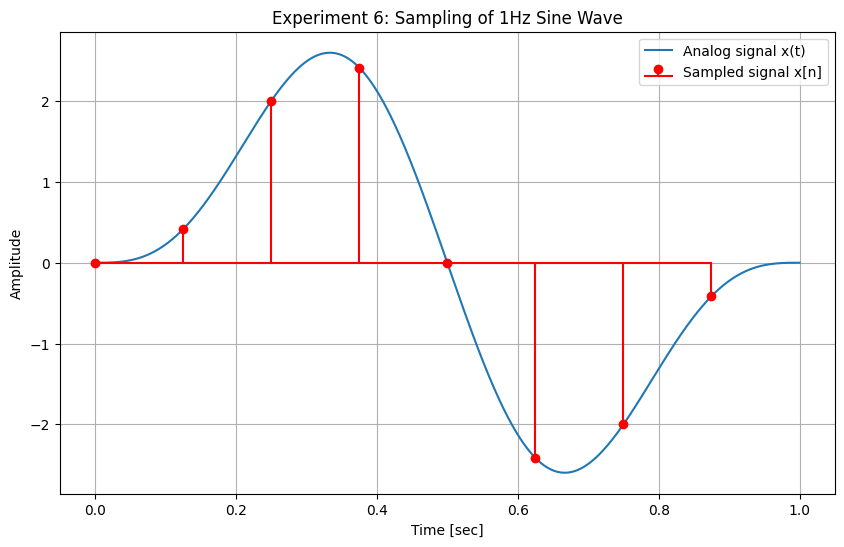

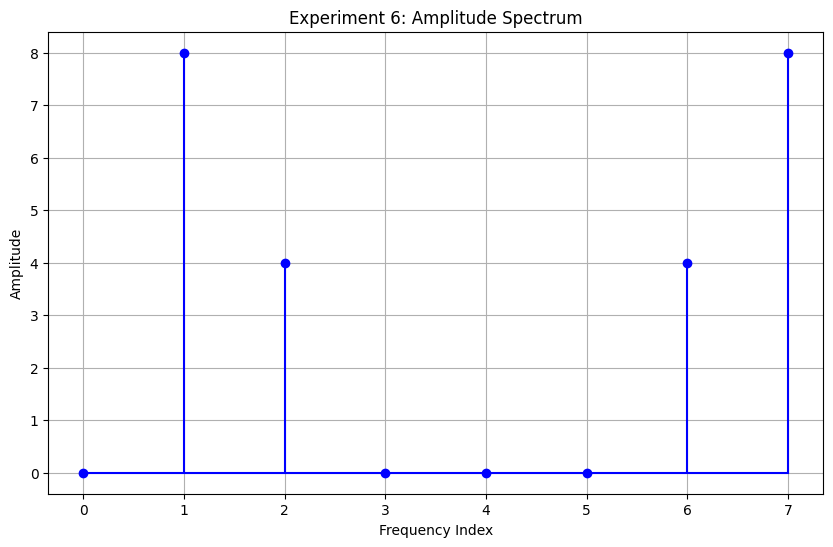

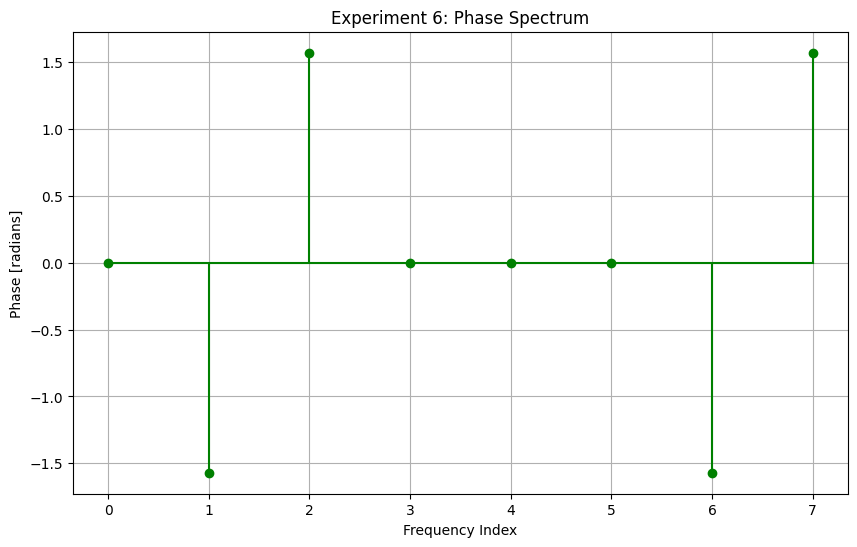

Experiment 6: Frequency Table
     k   ω [rad]      f  Ω [rad/sec]
0  0.0  0.000000  0.000     0.000000
1  1.0  0.785398  0.125     0.098175
2  2.0  1.570796  0.250     0.196350
3  3.0  2.356194  0.375     0.294524
4  4.0  3.141593  0.500     0.392699
5  5.0  3.926991  0.625     0.490874
6  6.0  4.712389  0.750     0.589049
7  7.0  5.497787  0.875     0.687223


In [79]:
# 1-6


def analyze_sine_wave_2(T0: float, experiment_num: int) -> None:
    # アナログ信号の生成
    t_continuous: np.ndarray = np.linspace(0, 1, 1000)  # 連続時間
    a_continuous: np.ndarray = 2 * np.sin(2 * np.pi * t_continuous) + np.sin(4 * np.pi * t_continuous + np.pi)

    # 離散時間信号の生成
    n: np.ndarray = np.arange(0, 8)
    t_discrete: np.ndarray = n * Ts
    a_discrete: np.ndarray = 2 * np.sin(2 * np.pi * t_discrete) + np.sin(4 * np.pi * t_discrete + np.pi)

    # プロット 1: 標本化
    plt.figure(figsize=(10, 6))
    plt.plot(t_continuous, a_continuous, label='Analog signal x(t)')
    plt.stem(t_discrete, a_discrete, linefmt='r-', markerfmt='ro', basefmt='r-', label='Sampled signal x[n]')
    plt.xlabel('Time [sec]')
    plt.ylabel('Amplitude')
    plt.title(f'Experiment {experiment_num}: Sampling of 1Hz Sine Wave')
    plt.legend()
    plt.grid()
    plt.savefig(f'sampling_experiment_{experiment_num}.png')
    plt.show()

    # DFT の計算
    N: int = len(a_discrete)
    X: np.ndarray = np.fft.fft(a_discrete, N)

    # 振幅スペクトル
    amplitude_spectrum: np.ndarray = np.abs(X)
    # 位相スペクトル
    fixed_X: np.ndarray = []
    for x in X:
        fixed_x_real = np.fix(x.real)
        fixed_x_imag = np.fix(x.imag)
        if (fixed_x_real == -0):
            fixed_x_real = 0
        fixed_X.append(complex(fixed_x_real, fixed_x_imag))
    phase_spectrum: np.ndarray = np.angle(fixed_X)

    # プロット 2: 振幅スペクトル
    plt.figure(figsize=(10, 6))
    plt.stem(n, amplitude_spectrum, linefmt='b-', markerfmt='bo', basefmt='b-')
    plt.xlabel('Frequency Index')
    plt.ylabel('Amplitude')
    plt.title(f'Experiment {experiment_num}: Amplitude Spectrum')
    plt.grid()
    plt.savefig(f'amplitude_spectrum_experiment_{experiment_num}.png')
    plt.show()

    # プロット 3: 位相スペクトル
    plt.figure(figsize=(10, 6))
    plt.stem(n, phase_spectrum, linefmt='g-', markerfmt='go', basefmt='g-')
    plt.xlabel('Frequency Index')
    plt.ylabel('Phase [radians]')
    plt.title(f'Experiment {experiment_num}: Phase Spectrum')
    plt.grid()
    plt.savefig(f'phase_spectrum_experiment_{experiment_num}.png')
    plt.show()

    # 周波数インデックスと各変数の対応表
    freq_index: np.ndarray = n
    omega: np.ndarray = 2 * np.pi * freq_index / N
    freq_Hz: np.ndarray = freq_index / N
    omega_rad_per_sec: np.ndarray = omega * Ts

    frequency_table: np.ndarray = np.vstack((freq_index, omega, freq_Hz, omega_rad_per_sec)).T

    df_frequency_table: pd.DataFrame = pd.DataFrame(frequency_table, columns=['k', 'ω [rad]', 'f', 'Ω [rad/sec]'])
    print(f'Experiment {experiment_num}: Frequency Table')
    print(df_frequency_table)

    # テーブルを保存
    df_frequency_table.to_csv(f'frequency_table_experiment_{experiment_num}.csv', index=False)

# 使用例
analyze_sine_wave_2(T0=1, experiment_num=6)

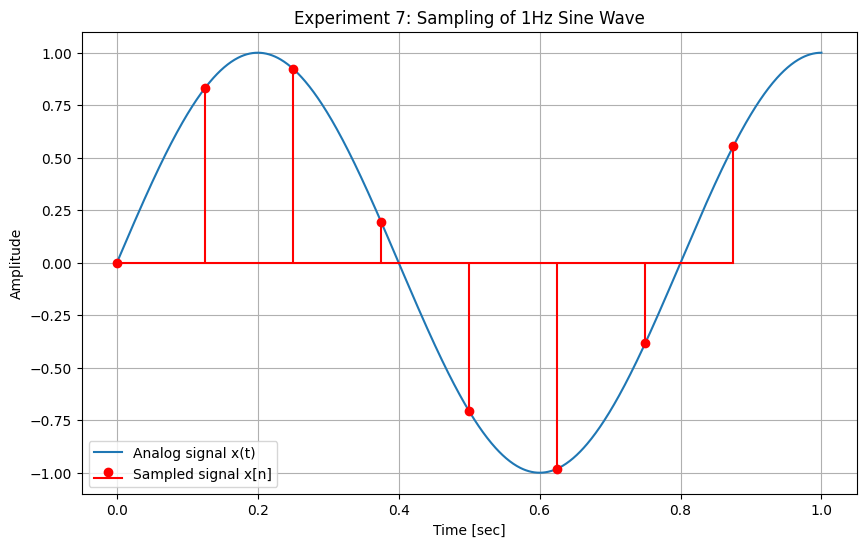

[0j, (2-2j), (-1+0j), 0j, 0j, -0j, (-1-0j), (2+2j)]


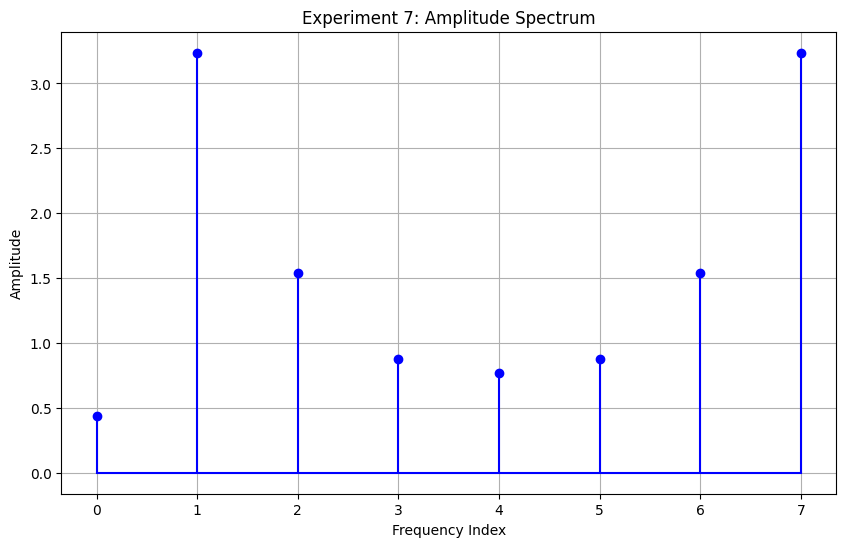

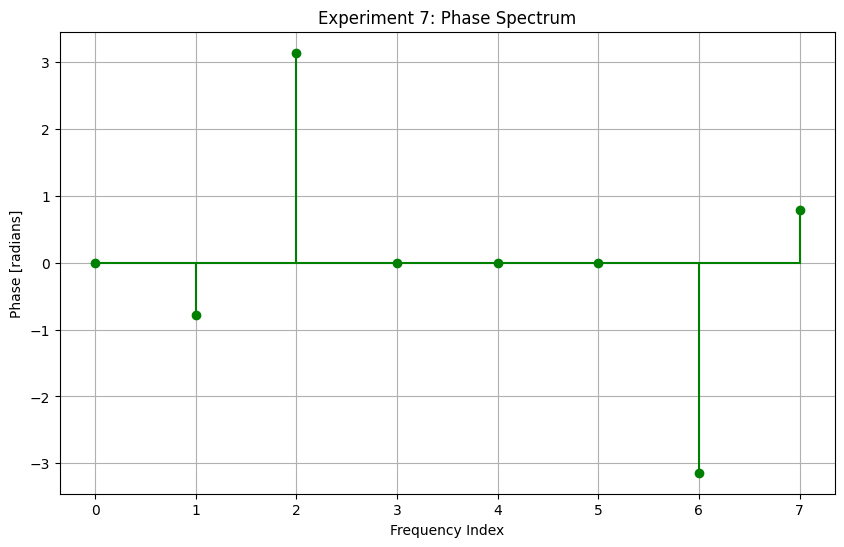

Experiment 7: Frequency Table
     k   ω [rad]      f  Ω [rad/sec]
0  0.0  0.000000  0.000     0.000000
1  1.0  0.785398  0.125     0.098175
2  2.0  1.570796  0.250     0.196350
3  3.0  2.356194  0.375     0.294524
4  4.0  3.141593  0.500     0.392699
5  5.0  3.926991  0.625     0.490874
6  6.0  4.712389  0.750     0.589049
7  7.0  5.497787  0.875     0.687223


In [80]:
# 1-7

analyze_sine_wave(A=1, T0=0.8, theta=0, D=0, experiment_num=7)
